In clustering,the objective is to ensure that the variation within a cluster is minimized while the variation between clusters is maximized.

Clustering algorithms are unsupervised learning algorithms (classes are not known a priori) whereas classification problems are supervised learning algorithms (where classes are known a priori in the training data). Another important difference is that clustering is descriptive analytics whereas classification is usually a predictive analytics algorithm.

Create heterogeneous subsets (clusters) from the original dataset such
that records within a cluster are homogeneous and identify the characteristics that differentiate the subsets.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
customers_df = pd.read_csv('Datasets\\Income Data.CSV')
customers_df.head()

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


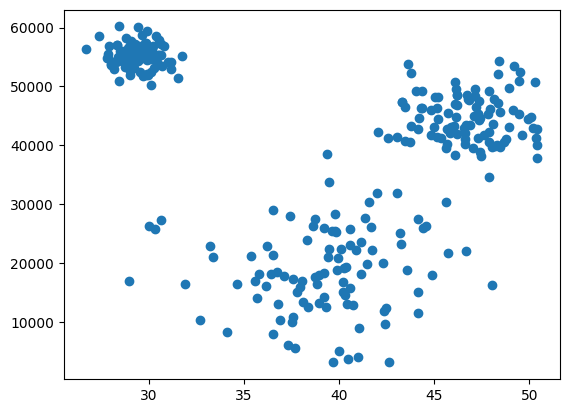

In [17]:
plt.scatter(customers_df.age,customers_df.income);

1. Euclidean Distance : Euclidean distance is the radial distance between two observations or records. If there are many attributes (features), then the distance across all attributes is calculated to find out the distance.

2. Minkowski Distance: It is the generalized distance measure between two observations.

3. Cosine Similarity: In this, X1 and X2 are two n-dimensional vectors. It measures the angle between two vectors (thus called as vector space model)


K-MEANS CLUSTERING

It is a non-hierarchical clustering method in which the number of clusters (K) is decided a priori. 

1. Decide the value of K (which can be fine-tuned later).
2. Choose K observations from the data that are likely to be in different clusters. There are many ways of choosing these initial K values; the easiest approach is to choose observations that are farthest (in one of the parameters of the data).
3. The K observations selected in step 2 are the centroids of those clusters.
4. For remaining observations, find the cluster closest to the centroid. Add the new observation (say observation j) to the cluster with the closest centroid. Adjust the centroid after adding a new observation to the cluster. The closest centroid is chosen based upon an appropriate distance measure.
5. Repeat step 4 until all observations are assigned to a cluster.

In [18]:
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(customers_df)

C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [20]:
customers_df['clusterid'] = clusters.labels_
customers_df[0:5]

,income,age,clusterid
0,41100.0,48.75,1
1,54100.0,28.10,2
2,47800.0,46.75,1
3,19100.0,40.25,0
4,18200.0,35.80,0


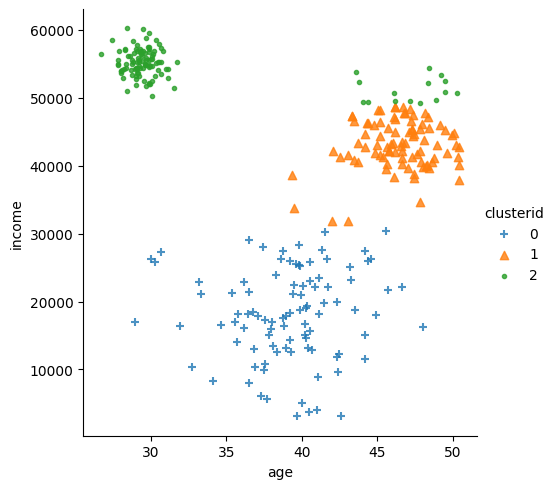

In [25]:
markers = ['+','^','.']
sn.lmplot(x='age', y='income',data = customers_df,hue = 'clusterid',
        fit_reg = False, markers = markers);

The above clusters are mostly segmented based on income. This is because the salary is on a larger scale compared to the age. The scale of age is 0 to 60, while salary ranges from 0 to 50000. 


Hence before creating clusters, all features need to be normalized and brought to normalized scale. StandardScaler in skleardn.preprocessing normalizes all values by subtracting all values from its mean and dividing by standard deviation.

In [26]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[['age','income']])
scaled_customers_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [29]:
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_customers_df)
customers_df['clusterid_new'] = clusters_new.labels_

C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


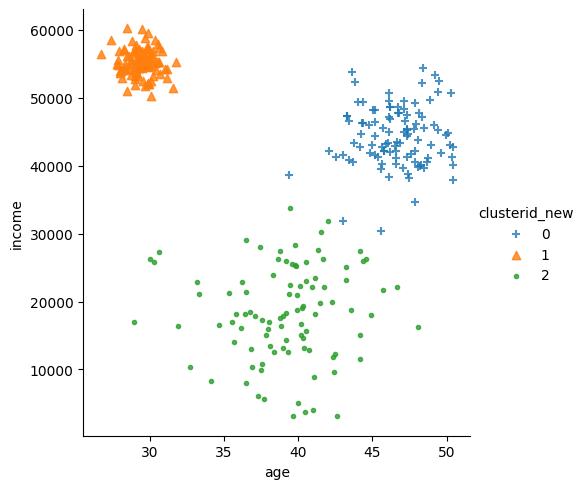

In [30]:
sn.lmplot(x='age', y='income',data = customers_df,hue = 'clusterid_new',
          fit_reg = False,markers = markers);

Cluster Centers and Interpreting the Clusters

Each cluster is defined by its cluster center. The cluster center explains the characteristic of the cluster and helps us to interpret the cluster.


In [33]:
customers_df.groupby('clusterid')[['age','income']].agg(['mean','std']).reset_index()

clusterid        age                  income             
                  mean       std          mean          std
0         0  39.174479  3.626068  18144.791667  6745.241906
1         1  46.419101  2.289620  43053.932584  3613.769632
2         2  31.700435  6.122122  54675.652174  2362.224320

CREATING PRODUCT SEGMENTS USING CLUSTERING

In [36]:
beer_df = pd.read_csv('Datasets\\beer.csv')
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [38]:
scaled_beer_df = scaler.fit_transform(beer_df.iloc[:,1:])
scaled_beer_df

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

How Many Clusters Exist?

As there are four features, it is not possible to plot and visualize them to understand how many clusters may exist. For high-dimensional data, the following techniques can be used for discovering the possible number of clusters:

1. Dendrogram
2. Elbow method

A dendrogram is a cluster tree diagram which groups those entities together that are nearer to each other.

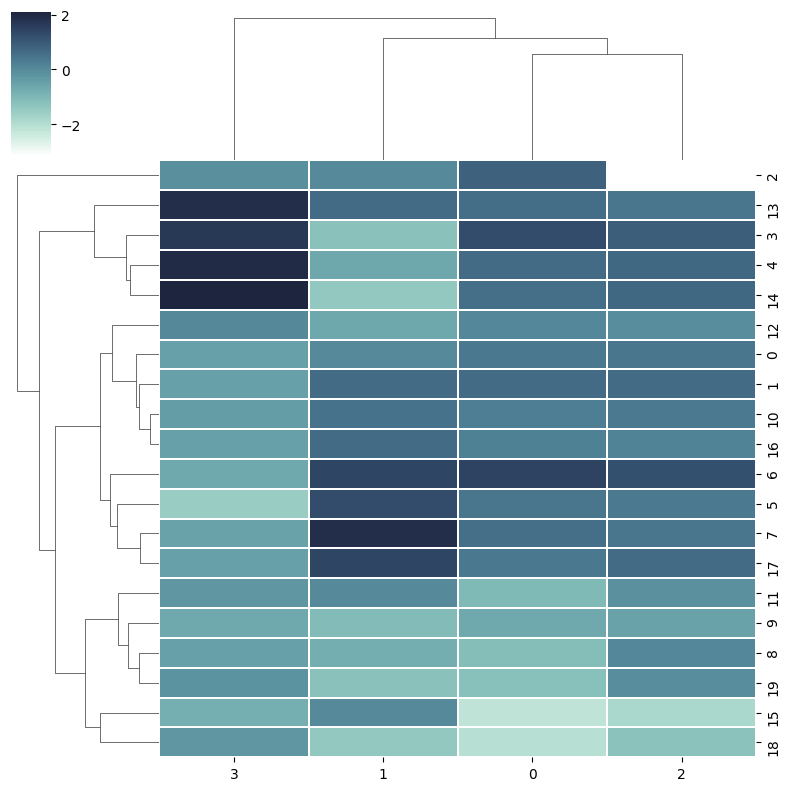

In [39]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_beer_df, cmap=cmap, linewidths=.2,figsize = (8,8));

Dendrogram reorders the observations based on how close they are to each other
using distances (Euclidean). The tree on the left of the dendrogram depicts the relative distance between nodes. For example, the distance between beer brand 10 and 16 is least.

In [40]:
beer_df.loc[[10,16]]

,name,calories,sodium,alcohol,cost
10,Coors,140,18,4.6,0.44
16,Hamms,139,19,4.4,0.43


Similarly, brands 2 and 18 seem to be most different as the distance is highest. They are represented on two extremes of the dendrogram.

In [42]:
beer_df.loc[[2,18]]

,name,calories,sodium,alcohol,cost
2,Lowenbrau,157,15,0.9,0.48
18,Olympia_Goled_Light,72,6,2.9,0.46


Finding Optimal Number of Clusters Using Elbow Curve Method

If we assume all the products belong to only one segment, then the variance of the cluster will be highest.
As we increase the number of clusters, the total variance of all clusters will start reducing. But the total variance will be zero if we assume each product is a cluster by itself.

So, Elbow curve method considers the percentage of variance explained as a function of the number of clusters. The optimal number of clusters is chosen in such a way that adding another cluster does not change the variance explained significantly.

For a set of records (X1, X2, …, Xn), where each observation is a d-dimensional real vector, K-means clustering algorithm segments the observations into k (≤ n) sets S = {S1, S2, …, Sk} to minimize the
within-cluster sum of squares (WCSS). 

WCSS is the sum of distances of each point in the cluster to the center of cluster across k clusters.

If the percentage of variance explained by the clusters is plotted against
the number of clusters, the initial increase in the number of clusters will add much information (and explain a lot of variances), but at some point, the marginal gain in explained variance will drop, giving an angle to the graph (similar to elbow). The number of clusters indicated at this angle can be chosen to be the most appropriate number of clusters; choosing the number of clusters in this approach is called “elbow criterion”.

The interia_ parameter in KMeans cluster algorithms provides the total variance for a particular number of clusters. 

C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

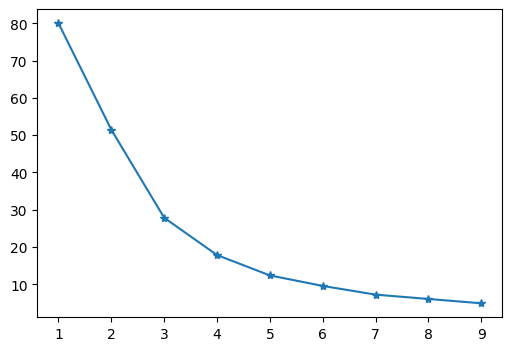

In [44]:
wcss = []
for num_clusters in range(1, 10):
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_beer_df)
    wcss.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot(range(1, 10), wcss, marker = '*');

The plot indicates that the elbow point is at 3, which in turn indicates there might be three clusters existing in the dataset.

In [45]:
clusters = KMeans(3, random_state = 42)
clusters.fit(scaled_beer_df)
beer_df['clusterid'] = clusters.labels_

C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0:

In cluster 0, beers with medium alcohol content and medium cost are grouped together. This is the largest segment and may be targeting the largest segment of customers.

In [46]:
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
16,Hamms,139,19,4.4,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


Cluster 1:

In cluster 1, all the light beers with low calories and sodium content are clustered into one group. This must be addressing the customer segment who wants to drink but are also calorie conscious.

In [47]:
beer_df[beer_df.clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,1
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1
11,Coors_Light,102,15,4.1,0.46,1
12,Michelob_Light,135,11,4.2,0.50,1
15,Pabst_Extra_Light,68,15,2.3,0.38,1
18,Olympia_Goled_Light,72,6,2.9,0.46,1
19,Schlitz_Light,97,7,4.2,0.47,1


Cluster 2:

These are expensive beers with relatively high alcohol content. Also, the sodium content is low. The costs are high because the target customers could be brand sensitive and the brands are promoted as premium brands.

In [48]:
beer_df[beer_df.clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


HIERARCHICAL CLUSTERING

1. Start with each data point in a single cluster.
2. Find the data points with the shortest distance (using an appropriate distance measure) and merge them to form a cluster.
3. Repeat step 2 until all data points are merged together to form a single cluster.

The above procedure is called an agglomerative hierarchical cluster. AgglomerativeClustering in sklearn. 
cluster provides an algorithm for hierarchical clustering and also takes the number of clusters to be created as an argument

In [49]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
h_clusters = AgglomerativeClustering(3)
h_clusters.fit(scaled_beer_df)
beer_df['h_clusterid'] = h_clusters.labels_

Both the clustering algorithms have created similar clusters. Only cluster ids have changed.

In [53]:
beer_df

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
2,Lowenbrau,157,15,0.9,0.48,1,0
3,Kronenbourg,170,7,5.2,0.73,2,2
4,Heineken,152,11,5.0,0.77,2,2
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
8,Miller_Lite,99,10,4.3,0.43,1,0
9,Budweiser_Light,113,8,3.7,0.40,1,0
